## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路, 加入BN
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    tag = f'BN-{batch}'
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[tag] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}

W0728 15:15:40.522212 4760540608 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 15:15:40.540104 4760540608 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 15:15:40.623601 4760540608 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0728 15:15:40.645639 4760540608 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 21s 428us/step - loss: 0.3244 - acc: 0.8858 - val_loss: 1.9552 - val_acc: 0.5347
Epoch 49/50
50000/50000 [==============================] - 21s 422us/step - loss: 0.3140 - acc: 0.8889 - val_loss: 1.9509 - val_acc: 0.5385
Epoch 50/50
50000/50000 [==============================] - 21s 422us/step - loss: 0.3149 - acc: 0.8887 - val_loss: 1.9775 - val_acc: 0.5415
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048     

50000/50000 [==============================] - 14s 289us/step - loss: 0.0787 - acc: 0.9760 - val_loss: 2.5779 - val_acc: 0.5145
Epoch 46/50
50000/50000 [==============================] - 14s 288us/step - loss: 0.0730 - acc: 0.9781 - val_loss: 2.5922 - val_acc: 0.5158
Epoch 47/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.0707 - acc: 0.9788 - val_loss: 2.6136 - val_acc: 0.5152
Epoch 48/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.0632 - acc: 0.9818 - val_loss: 2.6433 - val_acc: 0.5149
Epoch 49/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.0677 - acc: 0.9802 - val_loss: 2.6489 - val_acc: 0.5117
Epoch 50/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.0630 - acc: 0.9821 - val_loss: 2.6924 - val_acc: 0.5113
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072

50000/50000 [==============================] - 10s 190us/step - loss: 0.0549 - acc: 0.9910 - val_loss: 2.4900 - val_acc: 0.5003
Epoch 43/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.0477 - acc: 0.9927 - val_loss: 2.5061 - val_acc: 0.5044
Epoch 44/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.0483 - acc: 0.9916 - val_loss: 2.5196 - val_acc: 0.5099
Epoch 45/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.0477 - acc: 0.9918 - val_loss: 2.5596 - val_acc: 0.5038
Epoch 46/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.0399 - acc: 0.9940 - val_loss: 2.5771 - val_acc: 0.5088
Epoch 47/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.0441 - acc: 0.9922 - val_loss: 2.5688 - val_acc: 0.5053
Epoch 48/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.0365 - acc: 0.9949 - val_loss: 2.6104 - val_acc: 0.5057
Epoch 49/50
50000/50000 [=========

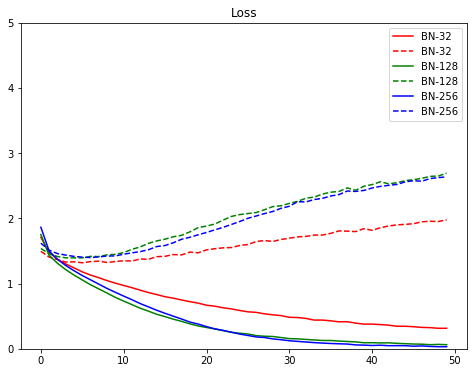

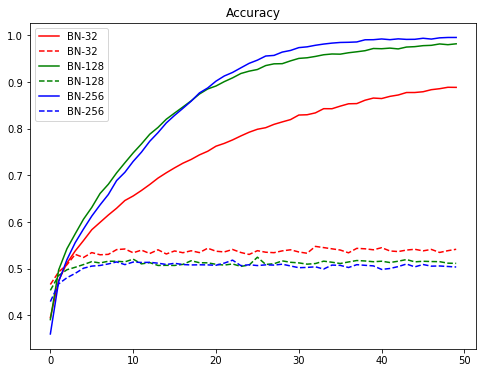

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()